Catherine Kuhn <br>
Homework #3 <br>
CEE 599 <br>

Using ipywidgets to interactively explore data 


<img src="http://imgs.xkcd.com/comics/python.png" alt="HTML5 Icon" width="300" height="150">



## Homework Outline

#### 1. Problem Statement

#### 2. Loading and Cleaning the Data with ``pandas``

#### 3. Question #1: Rally Points

#### 4. Question #2: Greenhouse Gas Fluxes from the Columbia River

#### 5.  Expanding my Toolkit

## 1. Problem Statement

This project tackles two separate, but important questions. In the first part, we seek to gain understanding about how taking breaks for fun activities can impact the productivity of a graduate student. In the second part, we will explore some data from a study in progress on the Columbia river. We know that building large hydropower structures on rivers changes the carbon cycling, and with this effort we are trying to quantify current carbon dioxide emissions coming off the river at the Dalles Dam. 

## 2. Loading Packages & Data

Import useful packages & the data

In [43]:
import numpy as np, pandas as pd

In [27]:
data = pd.read_csv('columbia_data.csv')

In [28]:
data.head(2)

,Date/Time,Q m^3s-1,Atm pressure Mb,TDG mB,CO2 corr ppm,Velocity m s-1,Depth m,Temp C,2 point Avg CO2,TotalDischarge m3 s,TurbineDischarge m3 s,TotalSpill m3 s,ForBayElev m,TailWaterElev m
0,3/26/2015 16:00,5970.931418,1017.249668,1069.245391,343.764698,0.636108,2.65176,8.6,NaN,5739.81536,0,0,48.429672,23.820120
1,3/26/2015 17:00,6071.957266,1017.249668,1069.245391,376.989963,0.646389,2.65176,8.6,360.37733,5799.28064,0,0,48.429672,23.792688


In [29]:
 date = pd.DatetimeIndex(data['Date/Time'])

In [1]:
# This gives us daily discharge for use later
daily_discharge = data.groupby(date.date)['TotalDischarge m3 s'].mean()

NameError: name 'data' is not defined

## 3. Rally Points & Productivity

In this section, we will interactively explore how the presence of rally points, defined here as opportunities to eat cookies, surf and sleep, impacts graduate student productivity. The overarching goal of this exploration is to locate a productivity threshold in which the graduate student is happy enough to work but not so happy she loses focus on work.  

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [32]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [33]:
from scipy import integrate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [34]:
x = np.linspace(1, 100, 100)
    #cookies = np.asarray(x * np.sin(x))
    #sleep = np.asarray(x * np.cos(x))
    #surfing = np.asarray(x * np.sin(x))

In [35]:
# Call in the super cool xkcd graphics tool
plt.xkcd()

# Make a function to plot happiness as a function of three different types of 
# rally points

def office_plot(cookies, sleep, surfing):
    y = surfing * x + cookies + sleep  # here is the function
    plt.plot(x, y, 'ro')   # call plot 
    plt.ylim(0, 100) # set axis limits
    plt.xlim(0,20)   # more axis limites
    plt.xlabel('Happiness as a Graduate Student')
    plt.ylabel("Rally Points")
  

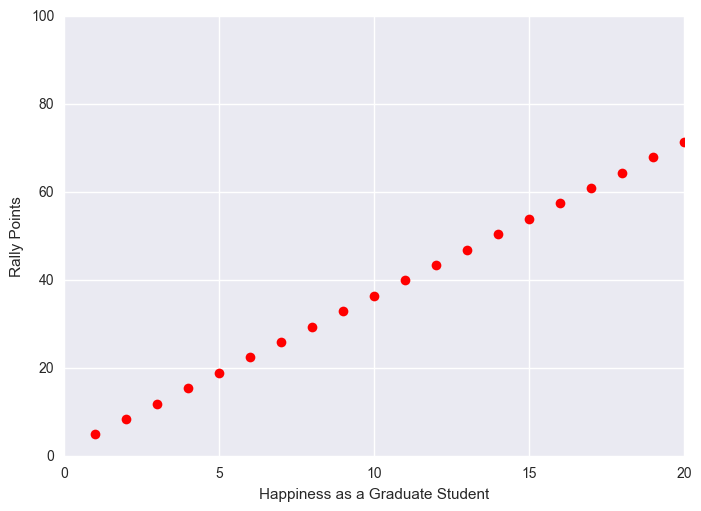

In [36]:
# This code sets three different interaction parameters (cookies, sleep
# and surfing) and applies them to the office plot function from the step above.

interact(office_plot,
         cookies=(0.0, 7.0),
         sleep=(-10, 20), # surfing makes me really happy so it gets the largest range
         surfing=(0, 5.0));

## 4. Greenhouse Gas Flux from the Columbia River

In this section, we will interactively explore how changing the piston velocity, or gas exchange rate, impacts carbon dioxide flux out of the Columbia River. Inland waters are increasingly recognized as known sources of greenhouse gases, integrating carbon from the landscape and churning it out as carbon dioxide and methane that evades to the atmosphere. 

The data we loaded contains observations of carbon dioxide concentrations (in parts per million (ppm)) taken at the Dalles Dam on the Columbia. To calculate how much carbon dioxide gas is leaving the river based on the concentration, we can use this equation from Wanninkoff (1996): 


            Flux = k * [atmospheric CO2 - dissolved CO2]   (1)
            
K, or gas transfer velocity, is the rate at which gases evade out of aquatic system -in this case the Columbia River. Despite being such an important variable, this transfer velocity can be notoriously hard to pin down and estimates can range widely. The dissolved CO2 is the measurements we took of the dissolved gas in the river. 

a. In this first exercise, we will explore how changing the gas transfer velocity impacts total flux from the Columbia river. We will use 402 ppm as our current atmospheric concentration (from NOAA's Earth Science Research Laboratory on Mauna Loa). 

In [37]:
# Define static parameters.  
co2 = data['CO2 corr ppm']
atmo =402

In [38]:
# Set up your plot. We want to look at flux but as a function of discharge, so we will plot two different x axis
def carbon_plot(k): 
    fig, ax1 = plt.subplots()
    t = date
    y = data['Q m^3s-1']
    ax1.plot(t, y, 'grey')
    ax1.set_xlabel('Date')
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('Discharge (cms)', color='grey')
    for tl in ax1.get_yticklabels():
        tl.set_color('grey')

    ax2 = ax1.twinx()
    s2 = k * (co2-atmo)
    ax2.plot(t, s2, 'r.')
    ax2.set_ylabel('CO2 Flux (ppm C m-1 d-1)', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.grid(False)
    plt.show()

Estimates for this gas transfer velocities (k) on the Columbia (9th order stream) are around 4 meters per day (<a href="http://www.nature.com/ngeo/journal/v4/n12/full/ngeo1294.html" Title="Title"> Butman 2011</a>).
. We will use an uncertainty interval of 2 that we totally made up for this excercise. 


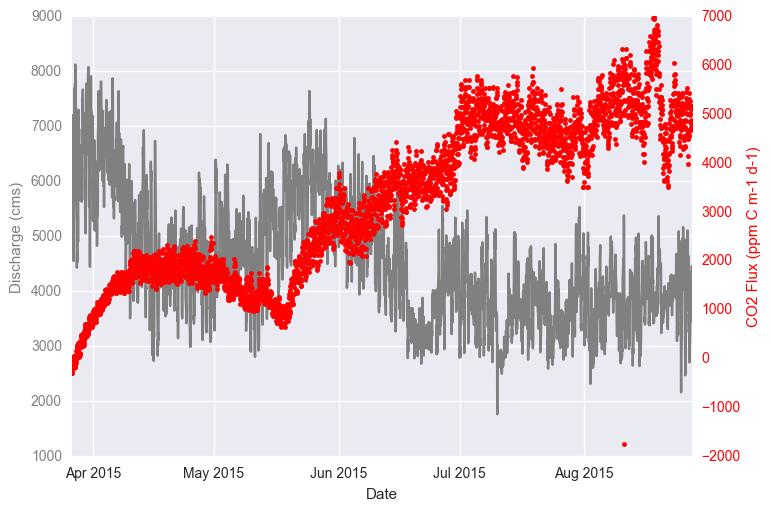

In [39]:
plt.rcdefaults()

import seaborn
seaborn.set()

interact(carbon_plot,
         k=(2, 6)); 

b. In this second exercise, we are going to adjust the atmospheric carbon dioxide levels
to explore how increasing atmospheric CO2 impacts the amount of carbon dioxide being generated by the river

In [40]:
# Define static parameters.  
co2 = data['CO2 corr ppm']
k = 4

In [41]:
# Set up your plot. We want to look at flux but as a function of discharge, so we will plot two different x axis
def carbon_plot(atmo): 
    fig, ax1 = plt.subplots()
    t = date
    y = data['Q m^3s-1']
    ax1.plot(t, y, 'grey')
    ax1.set_xlabel('Date')
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('Discharge (cms)', color='grey')
    for tl in ax1.get_yticklabels():
        tl.set_color('grey')

    ax2 = ax1.twinx()
    s2 = k * (co2-atmo)
    ax2.plot(t, s2, 'r.')
    ax2.set_ylabel('CO2 Flux (ppm C m-1 d-1)', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.grid(False)
    plt.show()

Now, we will allow users to change the atmospheric CO2 levels. According to chemical equilibrium, if CO2 concentrations are higher in the atmosphere, less gas will evade out of the water. We will let users choose any value between 382 ppm, which is the atmospheric concentration from a decade ago, to 402 ppm the current value of CO2 today. 

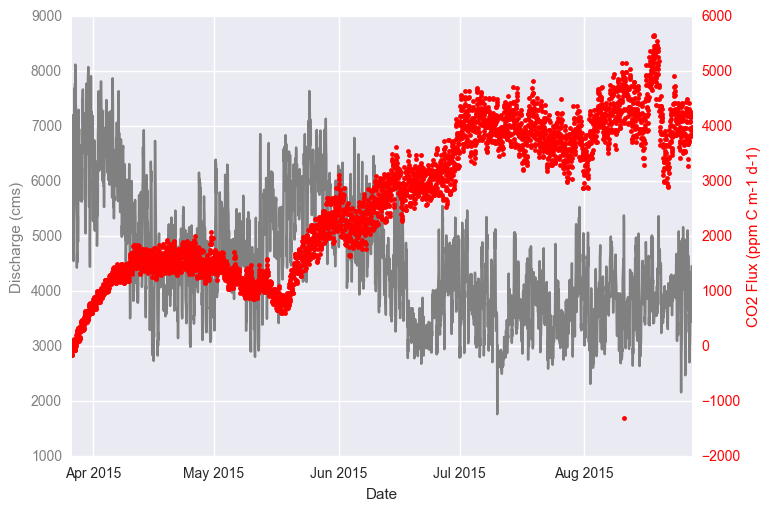

In [42]:
interact(carbon_plot,
         atmo=(382, 402)); 